# Modules

In [ ]:
# Import and mount to access drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Python Image Library
from PIL import Image

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

import random

In [ ]:
# Import KMeans module
from sklearn.cluster import KMeans

# Support Vector Machines (SVM)

## Task-1(a)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris(as_frame = True)

In [ ]:
# Extract petal length and petal width features
X = iris.data[['petal length (cm)', 'petal width (cm)']]

# Extract target classes
y = iris.target

In [ ]:
# Checking
print(X)
print(y)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


As per categorical encoding for target y :
* 0 -> setosa
* 1 -> versicolor
* 2 -> virginica

In [ ]:
# Filtering to include only 'setosa' and 'versicolor' classes
X = X[y.isin([0, 1])]
y = y[y.isin([0, 1])]

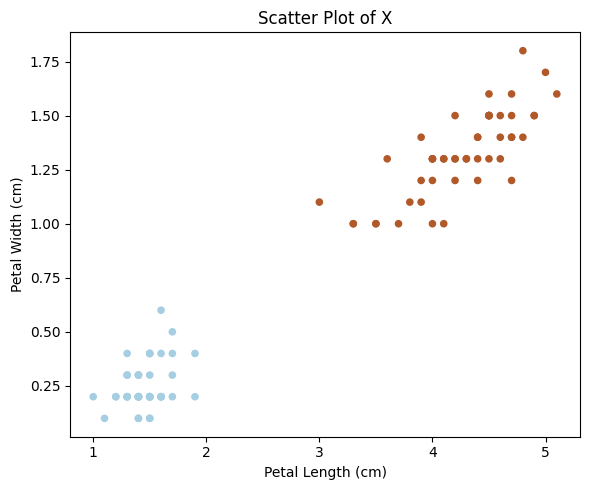

In [ ]:
plt.figure(figsize=(6, 5))

XX = X.to_numpy()
yy = y.to_numpy()

plt.scatter(XX[:, 0], XX[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of X')

plt.tight_layout()
plt.show()

* Although there are 100 data points in X I don't see that many in the scatter
* Let's check for duplicates

In [ ]:
total_duplicates = X.duplicated().sum()
print("Total number of duplicate rows:", total_duplicates)

Total number of duplicate rows: 42


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_ = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame
X = pd.DataFrame(X_, columns = X.columns)

In [ ]:
# Checking
print(X)

    petal length (cm)  petal width (cm)
0           -1.012978         -1.042111
1           -1.012978         -1.042111
2           -1.082312         -1.042111
3           -0.943643         -1.042111
4           -1.012978         -1.042111
..                ...               ...
95           0.928390          0.736235
96           0.928390          0.914070
97           0.997724          0.914070
98           0.096375          0.558401
99           0.859055          0.914070

[100 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# checking
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 2) (80,)
Testing set shape: (20, 2) (20,)


## Task-1 (b)

In [ ]:
from sklearn.svm import LinearSVC

# Train LinearSVC on the training data
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

* The seperating Hyperplane has an equation : ax1 + bx2 + c = 0
* a, b are given coefficients and c is the intercept

In [ ]:
# Values of a and b
clf.coef_

array([[0.90570671, 0.78660144]])

In [ ]:
# Value of c
clf.intercept_

array([0.27909346])

In [ ]:
# dataframe to numpy for easy operations
x1 = X_train.to_numpy()
y1 = y_train.to_numpy()

In [ ]:
# For plotting
x = np.arange(x1.min() - 1, x1.max() + 1, 0.01)
y = -(clf.intercept_[0] + (clf.coef_[0][0] * x))/clf.coef_[0][1]

**Support Vectors :**
* To include the support vectors of each class I am going to use the help of
decision_function which outputs the distance od each input/training data along with sign corresponding to which class it belongs
* Then I will sort them and get the nearest points
* Now that the support vectors are parallel to hyperplane and distance between two parallel lines is mod(c1 - c1) just add the distance to original hyperplane

In [ ]:
# Get distances of each point in input data
Z = clf.decision_function(x1)
Z = sorted(Z)
# Sort and get the least from each class
sv1, sv2 = 0, 0
for i in range(len(Z)):
  if Z[i] > 0:
    sv1 = Z[i - 1]
    sv2 = Z[i]
    break

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
# For plotting
ys1 = -(clf.intercept_[0] + (clf.coef_[0][0] * x) + sv1)/clf.coef_[0][1]
ys2 = -(clf.intercept_[0] + (clf.coef_[0][0] * x) + sv2 )/clf.coef_[0][1]

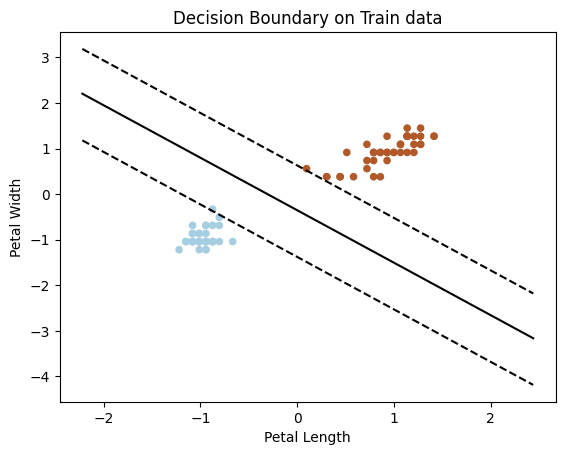

In [ ]:
# Train data
plt.scatter(x1[:, 0], x1[:, 1], c=y1, cmap=plt.cm.Paired, s=20)
# Hyperplane
plt.plot(x, y, linestyle='-', c = 'black')
# Support vector 1
plt.plot(x, ys1, linestyle='--', c = 'black')
# Support vector 2
plt.plot(x, ys2, linestyle='--', c = 'black')

# Add title and labels
plt.title('Decision Boundary on Train data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Show the plot
plt.show()

In [ ]:
# Make predictions
predictions = clf.predict(X_test)

In [ ]:
# dataframe to numpy for easy operations
x2 = X_test.to_numpy()
y2 = predictions

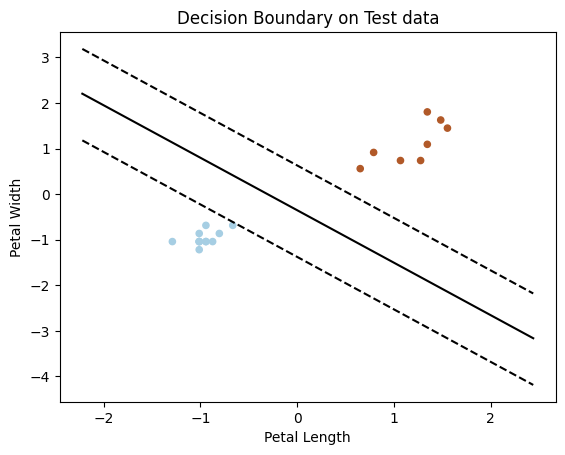

In [ ]:
# Predicted data
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap=plt.cm.Paired, s=20)
# Hyperplane
plt.plot(x, y, linestyle='-', c = 'black')
# Support vector 1
plt.plot(x, ys1, linestyle='--', c = 'black')
# Support vector 2
plt.plot(x, ys2, linestyle='--', c = 'black')

# Add title and labels
plt.title('Decision Boundary on Test data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Show the plot
plt.show()

## Task-2 (a)

In [ ]:
from sklearn.datasets import make_moons
# Generating synthetic dataset with make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Introduce 5% noise by randomly flipping 5% of labels
np.random.seed(42)  # for reproducibility
num_noise_points = int(0.05 * len(y))  # 5% of the total data points

# Randomly select indices to flip labels
noise_indices = np.random.choice(np.arange(len(y)), num_noise_points, replace=False)

# Flip the labels for the selected indices
y[noise_indices] = 1 - y[noise_indices]

# Now X contains the features and y contains the labels with 5% noise

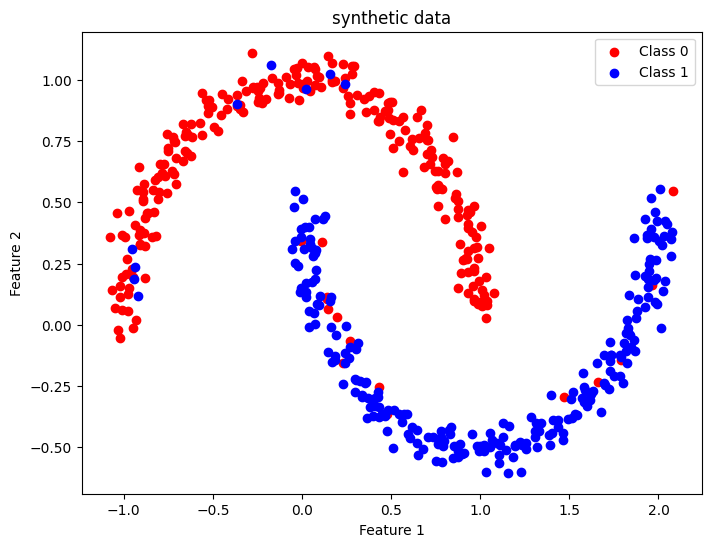

In [ ]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('synthetic data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Task-2 (b)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

SVC(kernel='linear')

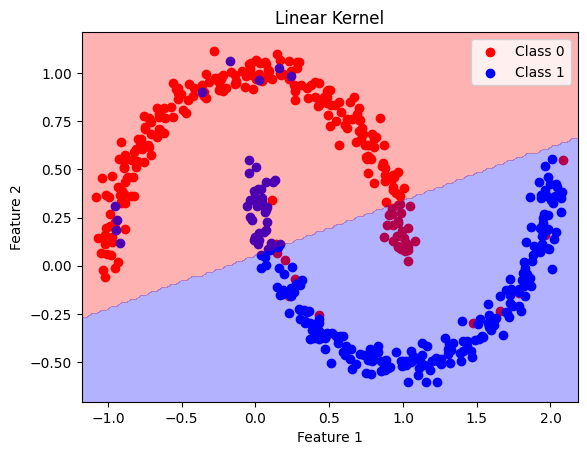

In [ ]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Linear Kernel')

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_linear.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, colors=['r', 'b'], levels=[0, 0.5, 1], alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [ ]:
y_pred = svm_linear.predict(X)

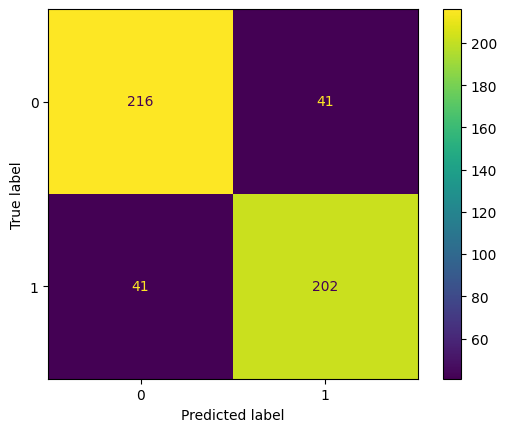

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       257
           1       0.83      0.83      0.83       243

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
# Polynomial
svm_poly = SVC(kernel='poly')
svm_poly.fit(X, y)

SVC(kernel='poly')

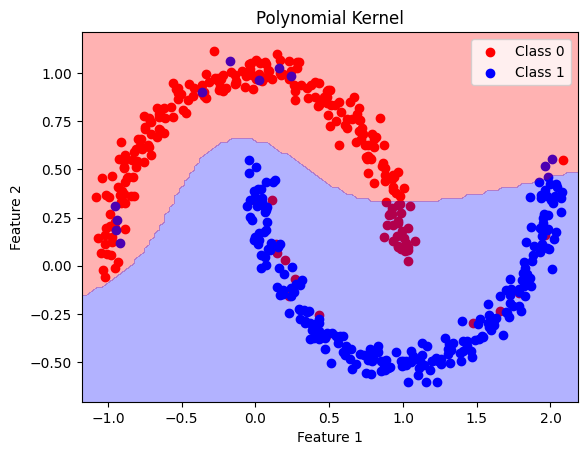

In [ ]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Polynomial Kernel')

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_poly.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, colors=['r', 'b'], levels=[0, 0.5, 1], alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [ ]:
y_pred = svm_poly.predict(X)

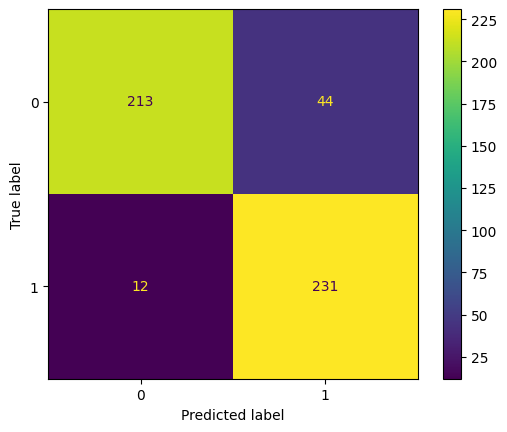

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88       257
           1       0.84      0.95      0.89       243

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [ ]:
# RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X, y)

SVC(C=1, gamma=0.5)

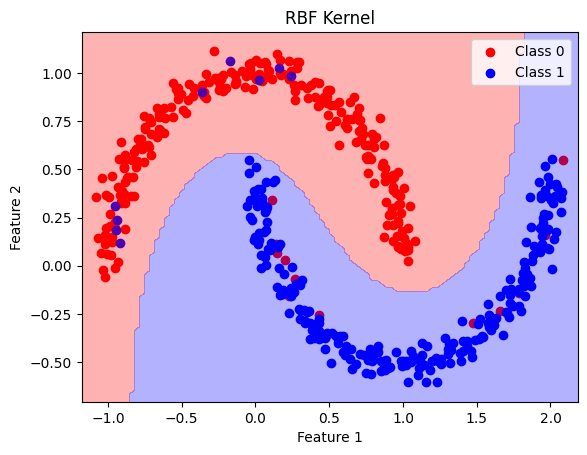

In [ ]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('RBF Kernel')

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_rbf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, colors=['r', 'b'], levels=[0, 0.5, 1], alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [ ]:
y_pred = svm_rbf.predict(X)

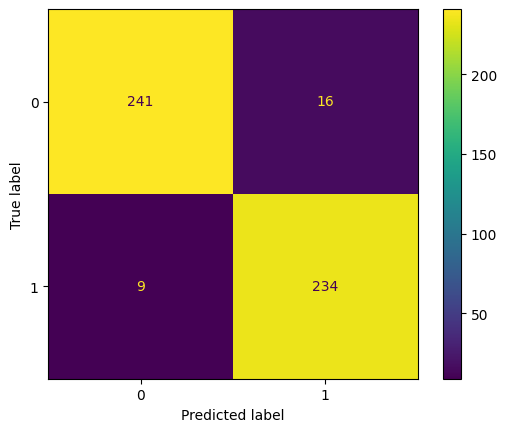

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       257
           1       0.94      0.96      0.95       243

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



## Task-2 (c)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.5, 1, 5, 10]}

# Create an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.5, 1, 5, 10]},
             scoring='accuracy')

In [ ]:
# Print all accuracies
print("All accuracies:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, std, params in zip(means, stds, params):
    print("Mean accuracy: {:.3f}, Std: {:f}, Parameters: {}".format(mean, std, params))

All accuracies:
Mean accuracy: 0.808, Std: 0.057411, Parameters: {'C': 0.1, 'gamma': 0.1}
Mean accuracy: 0.882, Std: 0.047074, Parameters: {'C': 0.1, 'gamma': 0.5}
Mean accuracy: 0.938, Std: 0.027857, Parameters: {'C': 0.1, 'gamma': 1}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 0.1, 'gamma': 5}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 0.1, 'gamma': 10}
Mean accuracy: 0.834, Std: 0.054626, Parameters: {'C': 1, 'gamma': 0.1}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 1, 'gamma': 0.5}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 1, 'gamma': 1}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 1, 'gamma': 5}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 1, 'gamma': 10}
Mean accuracy: 0.914, Std: 0.040299, Parameters: {'C': 10, 'gamma': 0.1}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 10, 'gamma': 0.5}
Mean accuracy: 0.950, Std: 0.022804, Parameters: {'C': 10, 'gamma': 1}
Mean accuracy: 0.950, Std: 0.022804, Parameters

In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 0.1, 'gamma': 5}


## Task-2 (d)

In [ ]:
# RBF
svm_rbf_best = SVC(kernel='rbf', C=0.1, gamma=5)
svm_rbf.fit(X, y)

SVC()

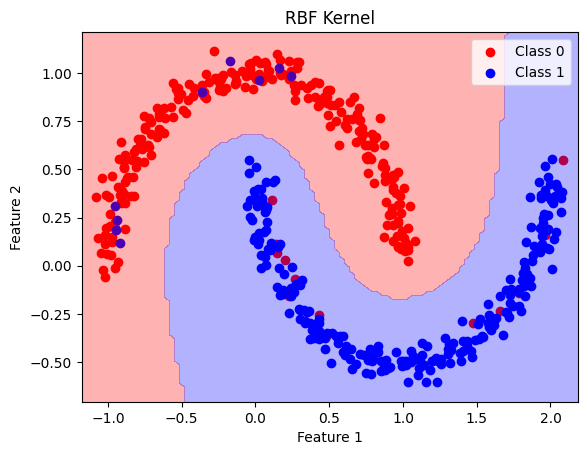

In [ ]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('RBF Kernel')

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = svm_rbf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, colors=['r', 'b'], levels=[0, 0.5, 1], alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

In [ ]:
y_pred = svm_rbf.predict(X)

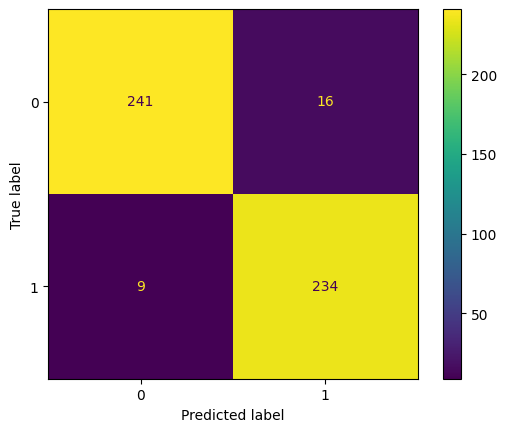

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
# Classification Report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       257
           1       0.94      0.96      0.95       243

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

